## Assignments for Week-03

### 1. Re-code the titanic machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*

## 2. Answer following questions:


###### 1. Why we need machine learning methods instead of creating a complicated formula?


Ans:因为我们很多时候并不能确定模型的具体细节，只能知道大致轮廓

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:随机选取变化方向的方法比较简单公平，会尝试每一种可能，但是走的弯路比较多

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:监督式学习比这种随机式选取变化方向肯定要好，监督式学习的关键在于每次根据实验结果反馈的参数变化量不好确定，当参数比较多时，参数空间比较大，改变的方向也比较多，不容易确定

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:导数或梯度代表了函数局部变化最快的方向，为我们寻找全局最小值可以提一定的依据

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:标准定义为函数在某一点的梯度是这样一个向量，它的方向与取得最大方向导数的方向一致，而它的模为方向导数的最大值。 
   梯度下降中核心问题是求损失函数的最小值，在每一轮迭代中寻找出每个参数的最佳变化方向，而这个变化方向就由梯度来确定，具体变化的幅度应该是该点的导数值和学习率λ的乘积，下降的含义是每一轮更新参数（k、b） k=k-λ*偏导值，使得loss函数变小（下降）

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:第三种方法需要的迭代次数最少，而且在参数空间较大时也可以最快的找出参数变化的方向。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:个人觉得机器学习主要是研究通过一定参数学习算法确定待确定数学模型相关参数的问题

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-April-20

>Submit: Submit the source code and result to github. 



#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package requests page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is get station information of all the subway lines;

> e.	You may need install @package beautiful soup  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> a.	Build the search agent based on the graph we build.

> b.	As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions. 


##### 4.	Create different policies for transfer system.

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


In [4]:
import requests

a. Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

In [5]:
url='https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 7.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.84 Safari/537.36'
}
#这里通过伪装头部，将HTTP请求伪装为浏览器发出，没有header会被屏蔽
response  = requests.get(url,headers=headers)


In [6]:
TEXT=response.content.decode("utf-8") #拿到了内容，但是如何找到目标？？

You may need install @package beautiful soup to get the url information, or just use > Regular Expression to get the url. Our recommendation is that using the Regular Expression and BeautiflSoup both.

In [7]:
#from BeautifulSoup import BeautifulSoup    错误

In [8]:
!pip install BeautifulSoup4 

Looking in indexes: http://pypi.douban.com/simple


In [9]:
from bs4 import BeautifulSoup  #beautifulsoup究竟是干嘛的,文档中选了一个demo

In [10]:
#demo 将字符串解析为标准的html格式
import re

doc = ['<html><head><title>Page title</title></head>',
       '<body><p id="firstpara" align="center">This is paragraph <b>one</b>.',
       '<p id="secondpara" align="blah">This is paragraph <b>two</b>.',
       '</html>']
soup = BeautifulSoup(''.join(doc))

print(soup.prettify())


<html>
 <head>
  <title>
   Page title
  </title>
 </head>
 <body>
  <p align="center" id="firstpara">
   This is paragraph
   <b>
    one
   </b>
   .
  </p>
  <p align="blah" id="secondpara">
   This is paragraph
   <b>
    two
   </b>
   .
  </p>
 </body>
</html>


In [11]:
soup_new = BeautifulSoup(''.join(TEXT))

In [12]:
#print(soup.prettify()) #该页面并无地铁站直接相关的集中信息

soup.findAll('b') 返回所有b标签的块
#[<b>one</b>, <b>two</b>]

In [13]:
#soup_new.findAll('table')#根据页面的特点，我们发现地铁站的线路链接集中在table标签下，搜索返回结果很长。

In [14]:
soup_new.findAll('table')[4] #第5个块对应的链接最集中

<table data-sort="sortDisabled" log-set-param="table_view" width="658"><tr><th width="198">线路号</th><th width="198">车辆型号</th><th width="198">编组</th></tr><tr><td valign="top" width="198"><a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁1号线</a></td><td align="left" valign="top" width="198">DKZ4 SFM04</td><td valign="top" width="198">6节B型</td></tr><tr><td colspan="1" rowspan="1" valign="top" width="198"><a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁2号线</a></td><td align="left" valign="top" width="198">DKZ16</td><td colspan="1" rowspan="1" valign="top" width="198">6节B型</td></tr><tr><td colspan="1" rowspan="1" valign="top" width="198"><a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁4号线</a></td><td align="left" valign="top" width="198">SFM05</td><td colspan="1" rowspan="1" valign="top" width="198">6节B型</td></tr><tr><td colspan="1" rowspan="1" valign="top"><a hre

In [15]:
List=soup_new.findAll('table')[4].findAll('a')#拿到A标签对应的所有链接

# 访问所有链接拿到地铁站的数据

In [16]:
import collections

In [17]:
for line in List:
    print(line.string)
    link = 'https://baike.baidu.com' + str(line.get('href'))
    print(link)     #拿到了所有的链接，这里的line本质是一个标签，href是它的属性

北京地铁1号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF
北京地铁2号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF
北京地铁4号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF
北京地铁5号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF
北京地铁6号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF
北京地铁7号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF
北京地铁8号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF
北京地铁9号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF
北京地铁10号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF
北京地铁13号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF
北京地铁14号线
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%

对每一个link，由于大多数link页面比较类似，可以用类似的操作拿到对应的站点, 先拿一个链接进行测试,2号线具有普遍特征

In [18]:
#link='https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF'  

In [19]:
#response  = requests.get(link,headers=headers)     

In [20]:
#TEXT_1=response.content.decode('utf-8')

In [21]:
#soup_new_1 = BeautifulSoup(''.join(TEXT_1))

In [22]:
def get_link(link):
    response  = requests.get(link,headers=headers)
    TEXT_1=response.content.decode('utf-8')
    soup_new_1 = BeautifulSoup(''.join(TEXT_1))
    return soup_new_1
    
    

In [23]:
#soup_new_1.find_all('table')[2].get_text()  #第三个表格数据比较全(站点 距离)，格式比较齐整,但是只有站点和时间，不能像上面那样直接取table，
#另外对于其他页面不一定对应第三个表格，故用正则表达式来描述目标，然后根据描述判断目标表格是否存在比较好

In [30]:
pattern_table = re.compile('[\w|\d]+相邻站间距信息统计表')

In [31]:
#cap_list=soup_new_1.find_all('caption') # 直接传入正则表达式搜索为空，因为这里传入的参数对应标签caption,故重新找到对应的标签，返回对应的标签列表

In [32]:
stations_connection = collections.defaultdict(list) #存储站点之间的连接关系 key_station:[list]
dist = collections.defaultdict(int) #key_station: distance 存储边的权值
node_in_line = collections.defaultdict(set) #线路中的站点集合 key：set（station）

In [33]:
#观察得知目标存在，程序需要用循环找到对应节点
pattern_station_to_station=re.compile('([\w|\d]+)——([\w|\d]+)')
for line in List[:-2]:
    #print(line.string)
    link = 'https://baike.baidu.com' + str(line.get('href'))
    soup_new_1= get_link(link)
    cap_list=soup_new_1.find_all('caption')
    
    for caption in cap_list:
        object=re.findall(pattern_table,str(caption))
        if(object):  #通过满足条件的节点找到其父节点 table object中包含地铁线路名
            print('找到了{}'.format(object[0]))
            table=caption.find_parent('table')       #根据table解析对应的信息
        
            for line in table.find_all('th'):        #<th>阜成门——复兴门</th>  可以解析出两个点
                l=re.findall(pattern_station_to_station, line.text)
                print(line.string)
                if (l):                              #line.string (text)返回的是其标签内的字符串 同时这里需要注意匹配为空，index非法
                    start,end= l[0]
                    #print(line.find_parents('tr'))
                    print(start,end)
                    distance = re.findall(re.compile('([\d]+)米*'), line.find_parent('tr').td.string)[0]#th节点与td的父节点均为tr节点 
                    print(distance)
                
                    stations_connection[start].append(end)              #存储连接关系
                    stations_connection[end].append(start)               
                    dist[(start,end)]=dist[(end,start)]=distance        #存储距离

                    node_in_line[start].add(object[0])                  #存储站点所属的线路
                    node_in_line[end].add(object[0])
            #print(table)
            break

找到了2号线相邻站间距信息统计表
起始/终到车站
区间距离
方向
西直门——车公庄
西直门 车公庄
909
车公庄——阜成门
车公庄 阜成门
960
阜成门——复兴门
阜成门 复兴门
1832
复兴门——长椿街
复兴门 长椿街
1234
长椿街——宣武门
长椿街 宣武门
929
宣武门——和平门
宣武门 和平门
851
和平门——前门
和平门 前门
1171
前门——崇文门
前门 崇文门
1634
崇文门——北京站
崇文门 北京站
1023
北京站——建国门
北京站 建国门
945
建国门——朝阳门
建国门 朝阳门
1763
朝阳门——东四十条
朝阳门 东四十条
1027
东四十条——东直门
东四十条 东直门
824
东直门——雍和宫
东直门 雍和宫
2228
雍和宫——安定门
雍和宫 安定门
794
安定门——鼓楼大街
安定门 鼓楼大街
1237
鼓楼大街——积水潭
鼓楼大街 积水潭
1766
积水潭——西直门
积水潭 西直门
1899
找到了4号线相邻站间距信息统计表
起始/终到车站
区间距离（米）
方向
安河桥北——北宫门
安河桥北 北宫门
1363
北宫门——西苑
北宫门 西苑
1251
西苑——圆明园
西苑 圆明园
1672
圆明园——北京大学东门
圆明园 北京大学东门
1295
北京大学东门——中关村
北京大学东门 中关村
887
中关村——海淀黄庄
中关村 海淀黄庄
900
海淀黄庄——人民大学
海淀黄庄 人民大学
1063
人民大学——魏公村
人民大学 魏公村
1051
魏公村——国家图书馆
魏公村 国家图书馆
1658
国家图书馆——动物园
国家图书馆 动物园
1517
动物园——西直门
动物园 西直门
1441
西直门——新街口
西直门 新街口
1025
新街口——平安里
新街口 平安里
1100
平安里——西四
平安里 西四
1100
西四——灵境胡同
西四 灵境胡同
869
灵境胡同——西单
灵境胡同 西单
1011
西单——宣武门
西单 宣武门
815
宣武门——菜市口
宣武门 菜市口
1152
菜市口——陶然亭
菜市口 陶然亭
1200
陶然亭——北京南站
陶然亭 北京南站
1643
北京南站——马家堡
北京南站 马家堡
1480
马家堡——角门西
马家堡 角门西
827
角门西——公益西桥
角门西 公益西桥
989
找到了5号线相邻站间

观察结果可以发现1、3、9号线等对应页面特殊，没有对应的距离表格，虽然最后的机场专线有表格，但通过刚才设计的算法无法提取到，这里需要特殊处理重新构建算法，然后在已搜集到的数据中继续进行试验。

In [34]:
link = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF'
soup_new_last= get_link(link)

In [35]:
list_end=soup_new_last.find_all('caption') #第3个

In [36]:
table_object=list_end[2]
#table_object.next_sibling( ) 兄弟节点
table=table_object.find_parent('table')
pattern_station_to_station=re.compile('([\w|\d]+)——([\w|\d]+)')

In [37]:
table.find_all('td')

[<td align="center" class="coloredcell" colspan="1" rowspan="1" valign="middle" width="338"><b>东直门——三元桥</b></td>,
 <td align="center" valign="middle" width="160">3022米</td>,
 <td align="center" valign="middle" width="159">上行/下行</td>,
 <td align="center" class="coloredcell" colspan="1" rowspan="1" valign="middle" width="338"><b>三元桥——T3航站楼</b></td>,
 <td align="center" valign="middle" width="160">18322米</td>,
 <td align="center" valign="middle" width="159">上行</td>,
 <td align="center" class="coloredcell" colspan="1" rowspan="1" valign="middle" width="338"><b>T3航站楼——T2航站楼</b></td>,
 <td align="center" valign="middle" width="160">7243米</td>,
 <td align="center" valign="middle" width="159">上行</td>,
 <td align="center" class="coloredcell" colspan="1" rowspan="1" valign="middle" width="338"><b>T2航站楼——三元桥</b></td>,
 <td align="center" valign="middle" width="160">20738米</td>,
 <td align="center" valign="middle" width="159">下行</td>,
 <td align="center" colspan="3" rowspan="1" valign="middle">参考资

In [155]:
for t in table.find_all('td'):
    m=re.findall(pattern_station_to_station,t.text)
    if m:
        start,end= m[0]
        print(start,end)
        stations_connection[start].append(end)              #存储连接关系
        stations_connection[end].append(start)  
        node_in_line[start].add('北京地铁机场线')                  #存储站点所属的线路
        node_in_line[end].add('北京地铁机场线')
        distance = re.findall(re.compile('([\d]+)米*'),t.next_sibling.string)[0]
        print(distance) 

东直门 三元桥
3022
{'北京地铁机场线', '13号线相邻站间距信息统计表', '2号线相邻站间距信息统计表'}
三元桥 T3航站楼
18322
{'北京地铁机场线', '10号线相邻站间距信息统计表'}
T3航站楼 T2航站楼
7243
{'北京地铁机场线'}
T2航站楼 三元桥
20738
{'北京地铁机场线'}


In [39]:
import networkx as nx

import matplotlib as plt


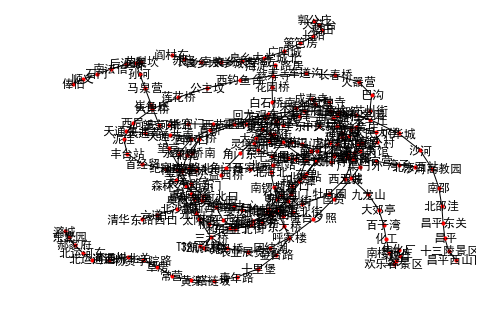

In [42]:
subway_graph = nx.Graph(stations_connection)  #尝试画图，发现大致线模拟成功
nx.draw(subway_graph, with_labels=True, node_size=10)

In [43]:
sou='''<th><div class="para" label-module="para">平西府——回龙观东大街</div>
</th>'''                                         #8号线中的一个特殊的例子使程序报错
soup_new_2 = BeautifulSoup(sou)
m=soup_new_2.find('th')
print(m.string)                                 # 对于这种多子节点标签，.string 返回none，导致后续无法正常匹配     
print(m.text)
l=re.findall(pattern_station_to_station,m.text) #这里,m .string 换为 m.text就可以避免报错。

None
平西府——回龙观东大街



如果一个 tag 仅有一个子节点，那么这个 tag 也可以使用 .string 方法，输出结果与当前唯一子节点的 .string 结果相同。
　　如果 tag 包含了多个子节点，tag 就无法确定 .string 方法应该调用哪个子节点的内容, .string 的输出结果是 None。

# build search 

In [44]:
def is_goal(destination):     
    def _wrap(current_path):
        return  current_path[-1] ==destination
    return _wrap

In [268]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        #if froniter in seen: continue  ##这里通过筛除过去验证过的节点，但是不同路径可能有交叉节点，如果提前验证了该交叉节点，后面验证的路径可能被淘汰
                                       ##直接删除可否？？
        successors = graph[froniter]
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
        #print('len(pathes)={}'.format(pathes))
       # print('seen :{}'.format(seen))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [269]:
search(stations_connection, start='丰台站', is_goal=is_goal('圆明园'), search_strategy=lambda n: n)

['丰台站',
 '泥洼',
 '西局',
 '六里桥',
 '莲花桥',
 '公主坟',
 '西钓鱼台',
 '慈寿寺',
 '车道沟',
 '长春桥',
 '火器营',
 '巴沟',
 '苏州街',
 '海淀黄庄',
 '中关村',
 '北京大学东门',
 '圆明园']

In [270]:
def sort_path(cmp_func, beam=-1):                               #这里对比优秀同学的作业和课堂上老师分享的代码，发现这里beam确实存在一定问题
    def _sorted(pathes):
        if beam == -1:                                          #老师的本意是beam作为一个参数来确定参与排序的路径的数目，简单的设置为-1，
            return sorted(pathes, key=cmp_func)                 #list中只有一个path时，list[:beam]会为空，导致整体返回为空
        else: #
            return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [271]:
def get_station_distance(a,b): 
    return int(dist[(a,b)])


In [272]:
def get_path_distance(path):  #距离
    distance = 0
    
    for i, c in enumerate(path[:-1]):
        distance += get_station_distance(c, path[i+1])
    
    return distance      

In [273]:
def get_total_station(path):  #站点总数
    return len(path)

In [274]:
def get_comprehensive_path(path): #结合两者
    return get_path_distance(path) + get_total_station(path)

In [275]:
def get_as_much_path(path):   #站数越多
    return -1 * len(path)

In [276]:
def get_least_line(path):    #该换乘统计方法错误，并不能统计次数
    c=set()
    for p in path:
        c=c|(node_in_line[p])
    print(len(c))
    
    return len(c)
        

In [277]:
def on_same_line(a,b):       #是否在同一条地铁线上   
    if(node_in_line[a] & node_in_line[b]):
        return True
    else:
        return False


def get_change_times(path): #改进求换乘算法次数 
    times=0
    for i in range(len(path)):
        if i==len(path)-2:
            break
        if not (on_same_line(path[i],path[i+2])):
            times=times+1
        else:
            times=times
    print(times)       
    return  times
        
        
            
        
        
        

In [278]:
 get_change_times(['大钟寺', '西直门', '车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '菜市口', '陶然亭', '北京南站'])

2


2

In [279]:
 get_change_times(['大钟寺', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站'])#这个换乘最少

1


1

In [280]:
stations_connection['平安里']

['新街口', '西四', '车公庄', '北海北']

In [281]:
search(stations_connection, start='丰台站', is_goal=is_goal('圆明园'), search_strategy =sort_path(get_path_distance))

['丰台站',
 '泥洼',
 '西局',
 '六里桥',
 '莲花桥',
 '公主坟',
 '西钓鱼台',
 '慈寿寺',
 '车道沟',
 '长春桥',
 '火器营',
 '巴沟',
 '苏州街',
 '海淀黄庄',
 '中关村',
 '北京大学东门',
 '圆明园']

In [282]:
search(stations_connection, start='丰台站', is_goal=is_goal('圆明园'), search_strategy =sort_path(get_comprehensive_path))

['丰台站',
 '泥洼',
 '西局',
 '六里桥',
 '莲花桥',
 '公主坟',
 '西钓鱼台',
 '慈寿寺',
 '车道沟',
 '长春桥',
 '火器营',
 '巴沟',
 '苏州街',
 '海淀黄庄',
 '中关村',
 '北京大学东门',
 '圆明园']

In [283]:
search(stations_connection, start='丰台站', is_goal=is_goal('圆明园'), search_strategy =sort_path(get_as_much_path))

['丰台站',
 '首经贸',
 '纪家庙',
 '草桥',
 '角门西',
 '马家堡',
 '北京南站',
 '陶然亭',
 '菜市口',
 '宣武门',
 '长椿街',
 '复兴门',
 '阜成门',
 '车公庄',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '东直门',
 '东四十条',
 '朝阳门',
 '建国门',
 '北京站',
 '崇文门',
 '磁器口',
 '天坛东门',
 '蒲黄榆',
 '刘家窑',
 '宋家庄',
 '成寿寺',
 '分钟寺',
 '十里河',
 '潘家园',
 '劲松',
 '双井',
 '国贸',
 '金台夕照',
 '呼家楼',
 '团结湖',
 '农业展览馆',
 '亮马桥',
 '三元桥',
 '太阳宫',
 '芍药居',
 '惠新西街南口',
 '惠新西街北口',
 '大屯路东',
 '北苑路北',
 '立水桥南',
 '立水桥',
 '霍营',
 '回龙观东大街',
 '平西府',
 '育知路',
 '朱辛庄',
 '生命科学园',
 '西二旗',
 '上地',
 '五道口',
 '知春路',
 '知春里',
 '海淀黄庄',
 '中关村',
 '北京大学东门',
 '圆明园']

In [284]:
search(stations_connection, start='丰台站', is_goal=is_goal('圆明园'), search_strategy =sort_path(get_total_station))

['丰台站',
 '泥洼',
 '西局',
 '六里桥',
 '莲花桥',
 '公主坟',
 '西钓鱼台',
 '慈寿寺',
 '车道沟',
 '长春桥',
 '火器营',
 '巴沟',
 '苏州街',
 '海淀黄庄',
 '中关村',
 '北京大学东门',
 '圆明园']

In [285]:
search(stations_connection, start='昌平', is_goal=is_goal('清华东路西口'), search_strategy =sort_path(get_total_station))

['昌平',
 '昌平东关',
 '北邵洼',
 '南邵',
 '沙河高教园',
 '沙河',
 '巩华城',
 '朱辛庄',
 '育知路',
 '平西府',
 '回龙观东大街',
 '霍营',
 '育新',
 '西小口',
 '永泰庄',
 '林萃桥',
 '森林公园南门',
 '奥林匹克公园',
 '北沙滩',
 '六道口',
 '清华东路西口']

In [286]:
search(stations_connection, start='大钟寺', is_goal=is_goal('北京南站'), search_strategy =sort_path(get_change_times))

0
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


['大钟寺', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站']

上面结果不正确的原因是因为 if froniter in seen: continue  这里通过筛除验证过的节点导致最少换乘的路径被淘汰。

In [256]:
search(stations_connection, start='新街口', is_goal=is_goal('北京南站'), search_strategy =sort_path(get_change_times))

['新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站']

In [204]:
search(stations_connection, start='大钟寺', is_goal=is_goal('北京南站'), search_strategy =sort_path(get_path_distance))

['大钟寺', '西直门', '车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '菜市口', '陶然亭', '北京南站']

In [205]:
search(stations_connection, start='大钟寺', is_goal=is_goal('北京南站'), search_strategy =sort_path(get_total_station))

['大钟寺', '西直门', '车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '菜市口', '陶然亭', '北京南站']

结果基本符合要求